# 01 - Example Syntax Visualizations

## Imports

In [1]:
import avn.syntax as syntax
import avn.plotting as plotting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

c:\Users\tkoch\anaconda3\envs\fresh_avn_dev\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## B447 Example Figures

In [2]:
Bird_ID = 'B447'
path_to_syll_df = "D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "_labels.csv" 
syll_df = pd.read_csv(path_to_syll_df)

In [3]:
syntax_data = syntax.SyntaxData(Bird_ID, syll_df)
syntax_data.add_file_bounds("D:\\Final_Bird_Dataset\\FP1_project_birds\\labeled_songs\\")
syntax_data.add_gaps(min_gap = 0.2)
syntax_data.drop_calls()

In [4]:
syntax_data.make_transition_matrix()

In [5]:
plt.rcParams.update({'font.size': 8})

Text(0.5937499999999964, 0.5, 'Preceeding Syllable Label')

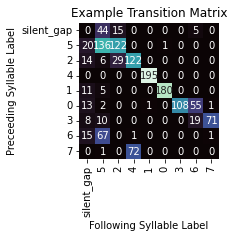

In [7]:
plt.figure(figsize = (2.5, 2.5))

trans_mat = syntax_data.trans_mat[['silent_gap', 5, 2, 4, 1, 0, 3, 6, 7,]]
trans_mat = trans_mat.reindex(['silent_gap', 5, 2, 4, 1, 0, 3, 6, 7,])
sns.heatmap(trans_mat, annot = True, fmt = '0.0f', cbar=False, cmap = 'mako' )
plt.title("Example Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceeding Syllable Label')

Text(18.593749999999996, 0.5, 'Preceding Syllable Label')

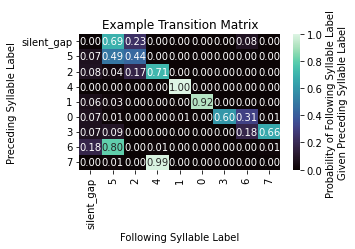

In [9]:
plt.figure(figsize = (4.5, 2.5))
trans_mat = syntax_data.trans_mat_prob[['silent_gap', 5, 2, 4, 1, 0, 3, 6, 7,]]
trans_mat = trans_mat.reindex(['silent_gap', 5, 2, 4, 1, 0, 3, 6, 7,])
sns.heatmap(trans_mat, annot = True, fmt = '0.2f', cmap = 'mako',
            cbar_kws={'label' : 'Probability of Following Syllable Label \nGiven Preceding Syllable Label'}) 
plt.title("Example Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceding Syllable Label')
#plt.xticks([])
#plt.yticks([])
#plt.savefig('B447_transition_probability_matrix.svg', transparent = True)

In [6]:
plt.rcParams.update({'font.size': 18})

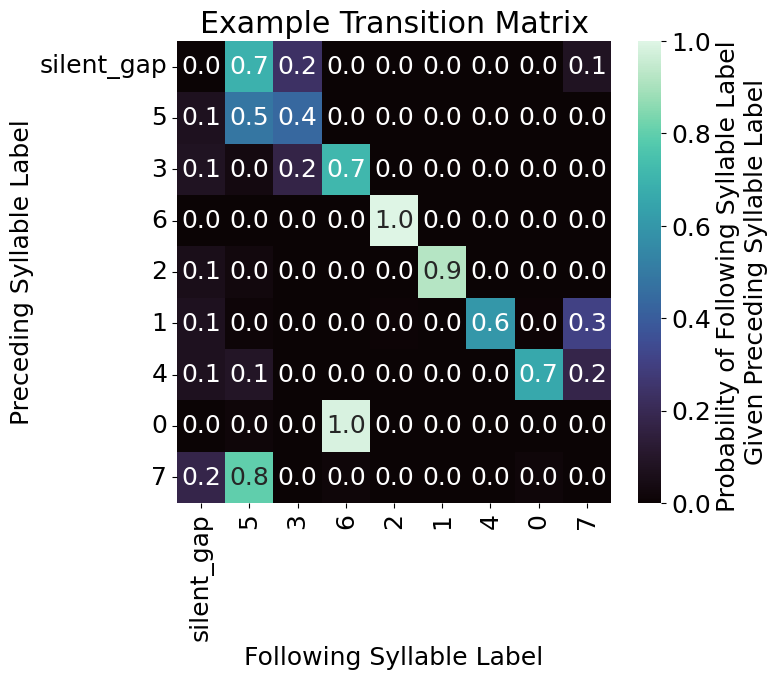

In [11]:
plt.figure(figsize = (7, 6))
trans_mat = syntax_data.trans_mat_prob[['silent_gap', 5, 3, 6, 2, 1, 4, 0, 7]]
trans_mat = trans_mat.reindex(['silent_gap', 5, 3, 6, 2, 1, 4, 0, 7])
sns.heatmap(trans_mat, annot = True, fmt = '0.1f', cmap = 'mako',
            cbar_kws={'label' : 'Probability of Following Syllable Label \nGiven Preceding Syllable Label'}) 
plt.title("Example Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceding Syllable Label')
#plt.xticks([])
#plt.yticks([])
plt.savefig('poster_B447_transition_probability_matrix.svg', transparent = True)

In [10]:
def plot_syntax_raster(syntax_data, syntax_raster_df, figsize = (10, 10), title = None, 
                           palette = 'husl', out_path = None):
    """
    Plots a syntax_raster_df dataframe. 

    Parameters
    ----------
    syntax_data: avn.syntax.SyntaxData object
        An instance of avn.syntax.SyntaxData on which `.make_synta_raster()` was called 
        to generate `syntax_raster_df`. 

    syntax_raster_df: Pandas DataFrame
        Dataframe where each row reflects a song bout (a sequence of syllables flanked by 
        file boundaries or long silent gaps), and each cell contains the label of the song 
        syllable produced at that index in the song bout, based on `syntax_data.syll_df.labels`.
        This is returned by `.make_syntax_raster()` called on an instance of a 
        `syntax.SyntaxData` object. 

    figsize: tuple, optional
        Tuple specifying dimensions of output figure. The default is (10, 10)

    title: String, optional
        Title of the output figure. The default is None, which will result in a figure
        without a title.
    
    palette: string or sequence, optional
        String corresponding to the name of a seaborn palette, matplotlib colormap
        or sequence of colors in any format matplotlib accepts. See `seaborn.color_palette()` 
        documentation for more information. The default is 'husl'. 

    Returns
    -------
    None
    
    """
    #get the number of unique syllable types 
    n = len(syntax_data.unique_labels)

    #specify a color map according to the number of syllable types
    cmap = sns.color_palette(palette, n)

    #create dictionary to convert characters to ints for plotting if bout_df contains 
    # character syllable labels
    if type(syntax_data.unique_labels[0]) != 'int':
        keys = syntax_data.unique_labels
        keys.sort()
        values = range(n)

        to_int_dict = dict(zip(keys, values))

        syntax_raster_df = syntax_raster_df.replace(to_int_dict)

    #plot syntax raster
    fig, ax = plt.subplots(figsize = figsize)
    ax = sns.heatmap(syntax_raster_df, cmap = cmap, linewidth = 0.5, mask = (syntax_raster_df.isna()))

    #add syllable labels to colorbar
    colorbar = ax.collections[0].colorbar
    r = colorbar.vmax - colorbar.vmin
    colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
    colorbar.set_ticklabels(list(to_int_dict.keys()))

    #hide x and y axis lines and ticks
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    plt.xticks([])
    plt.yticks([])

    #add title
    plt.title(title)
    plt.xlabel('Syllables')
    plt.ylabel('Bouts')

    if out_path is not None:
        plt.savefig(out_path, transparent = True)

    plt.show()

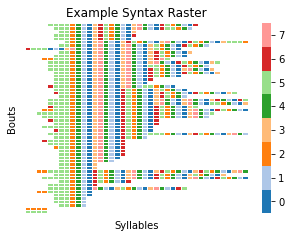

In [14]:
syntax_raster_df = syntax_data.make_syntax_raster(alignment_syllable= 4)
syntax_raster_df = syntax_raster_df.loc[syntax_raster_df.count(axis = 1)>3,]
syntax_raster_df = syntax_raster_df.iloc[:, :40]
plot_syntax_raster(syntax_data, syntax_raster_df, title = 'Example Syntax Raster', figsize=(5, 3.5), palette= 'tab20', 
                   # out_path = 'B447_syntax_raster.svg'
                   )


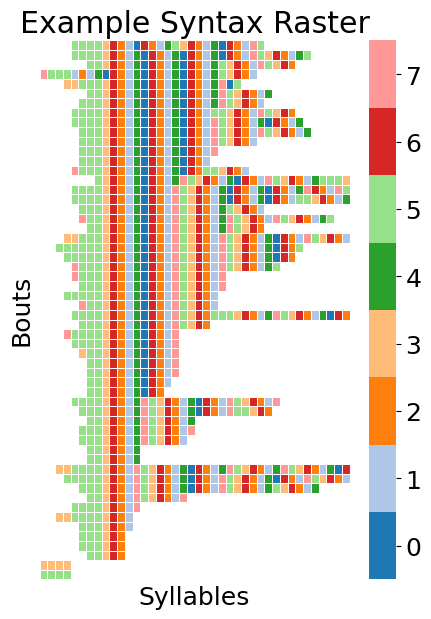

In [15]:
syntax_raster_df = syntax_data.make_syntax_raster(alignment_syllable= 4)
syntax_raster_df = syntax_raster_df.loc[syntax_raster_df.count(axis = 1)>3,]
syntax_raster_df = syntax_raster_df.iloc[:, :40]
plot_syntax_raster(syntax_data, syntax_raster_df, title = 'Example Syntax Raster', figsize=(5, 7), palette= 'tab20', 
                    out_path = 'poster_B447_syntax_raster.svg')

## O421 Examples

In [18]:
Bird_ID = 'O421'
path_to_syll_df = "D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "_labels.csv" 
syll_df = pd.read_csv(path_to_syll_df)

In [19]:
syntax_data = syntax.SyntaxData(Bird_ID, syll_df)
syntax_data.add_file_bounds("D:\\Final_Bird_Dataset\\FP1_project_birds\\labeled_songs\\")
syntax_data.add_gaps(min_gap = 0.2)
syntax_data.drop_calls()

In [20]:
syntax_data.make_transition_matrix()

In [21]:
plt.rcParams.update({'font.size': 8})

Text(23.81597222222222, 0.5, 'Preceeding Syllable Label')

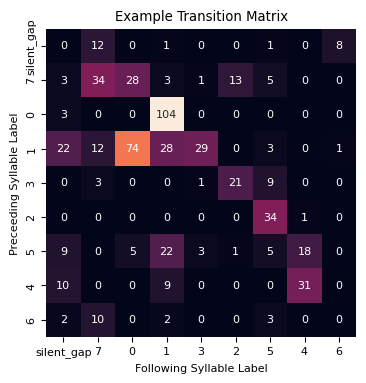

In [22]:
plt.figure(figsize = (4, 4))

trans_mat = syntax_data.trans_mat[['silent_gap', 7, 0, 1, 3, 2, 5, 4, 6]]
trans_mat = trans_mat.reindex(['silent_gap', 7, 0, 1, 3, 2, 5, 4, 6])
sns.heatmap(trans_mat, annot = True, fmt = '0.0f', cbar=False)
plt.title("Example Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceeding Syllable Label')

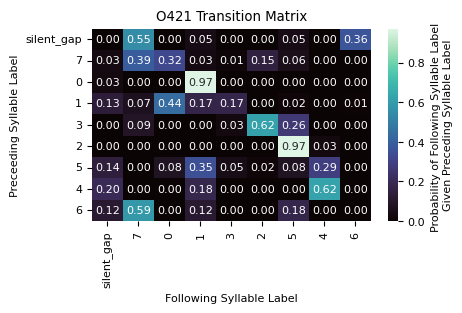

In [29]:
trans_mat = syntax_data.trans_mat_prob[['silent_gap', 7, 0, 1, 3, 2, 5, 4, 6]]
trans_mat = trans_mat.reindex(['silent_gap', 7, 0, 1, 3, 2, 5, 4, 6])

plt.figure(figsize = (4.5, 2.5))
sns.heatmap(trans_mat, annot = True, fmt = '0.2f', cmap = 'mako',
            cbar_kws={'label' : 'Probability of Following Syllable Label \nGiven Preceding Syllable Label'})
plt.title("O421 Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceeding Syllable Label')
plt.savefig('O421_transition_matrix.svg', transparent = True)

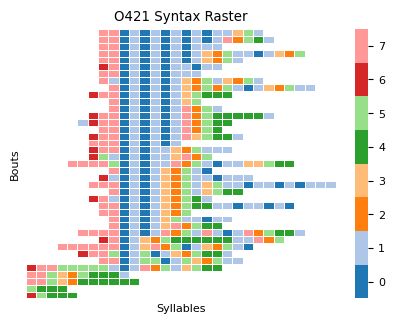

In [30]:
syntax_raster_df = syntax_data.make_syntax_raster(alignment_syllable=0)
syntax_raster_df = syntax_raster_df.loc[syntax_raster_df.count(axis = 1)>3,]
syntax_raster_df = syntax_raster_df.iloc[:, :40]
plot_syntax_raster(syntax_data, syntax_raster_df, title = 'O421 Syntax Raster', figsize=(5, 3.5), palette= 'tab20', 
                    out_path = 'O421_synta_raster.svg')

## O440

In [3]:
Bird_ID = 'O440'
path_to_syll_df = "D:\\Final_Bird_Dataset\\UMAP_WSeg_labels_updated\\" + Bird_ID + "_labels.csv" 
syll_df = pd.read_csv(path_to_syll_df)

In [4]:
syntax_data = syntax.SyntaxData(Bird_ID, syll_df)
syntax_data.add_file_bounds("D:\\Final_Bird_Dataset\\FP1_project_birds\\labeled_songs\\")
syntax_data.add_gaps(min_gap = 0.2)
syntax_data.drop_calls()

In [5]:
syntax_data.make_transition_matrix()

In [6]:
plt.rcParams.update({'font.size': 8})

Text(18.51909722222222, 0.5, 'Preceeding Syllable Label')

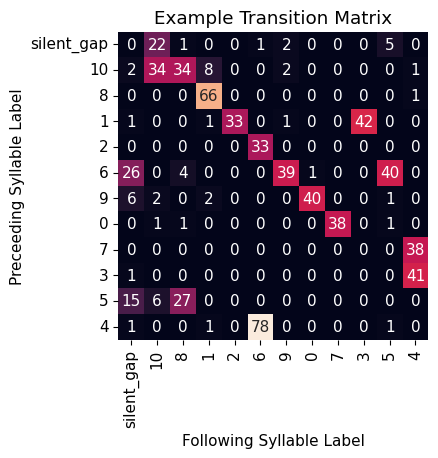

In [26]:
plt.figure(figsize = (4, 4))

trans_mat = syntax_data.trans_mat[['silent_gap', 10, 8, 1, 2, 6, 9, 0, 7, 3, 5, 4]]
trans_mat = trans_mat.reindex(['silent_gap', 10, 8, 1, 2, 6, 9, 0, 7, 3, 5, 4])
sns.heatmap(trans_mat, annot = True, fmt = '0.0f', cbar=False)
plt.title("Example Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceeding Syllable Label')

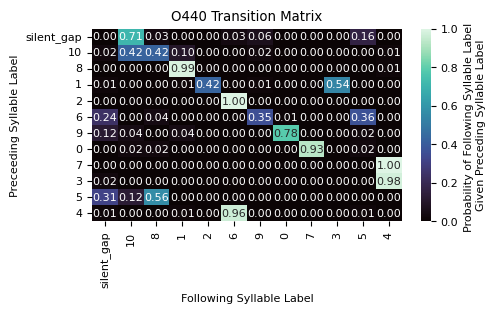

In [10]:
trans_mat = syntax_data.trans_mat_prob[['silent_gap', 10, 8, 1, 2, 6, 9, 0, 7, 3, 5, 4]]
trans_mat = trans_mat.reindex(['silent_gap', 10, 8, 1, 2, 6, 9, 0, 7, 3, 5, 4])

plt.figure(figsize = (5, 2.5))
sns.heatmap(trans_mat, annot = True, fmt = '0.2f', cmap = 'mako',
            cbar_kws={'label' : 'Probability of Following Syllable Label \nGiven Preceding Syllable Label'})
plt.title("O440 Transition Matrix");
plt.xlabel('Following Syllable Label')
plt.ylabel('Preceeding Syllable Label')
plt.savefig('O440_transition_matrix.svg', transparent = True)

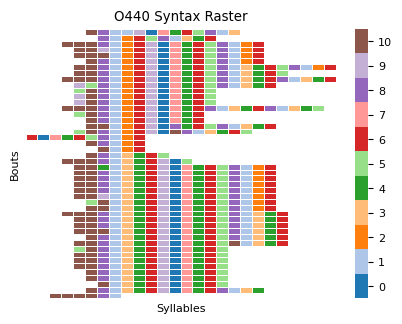

In [13]:
syntax_raster_df = syntax_data.make_syntax_raster(alignment_syllable=1)
syntax_raster_df = syntax_raster_df.loc[syntax_raster_df.count(axis = 1)>3,]
syntax_raster_df = syntax_raster_df.iloc[:, :40]
plot_syntax_raster(syntax_data, syntax_raster_df, title = 'O440 Syntax Raster', figsize=(5, 3.5), palette= 'tab20', 
                    out_path = 'O440_synta_raster.svg')